# Preparing the ROC curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve


In [ ]:
import pandas as pd

### Functions to use
***roc_curve()***

input: 
1. y_true= ndarray of shape(n_samples) with true binary labels
2. y_score= ndarray of shape (n_samples,) with target scores (e-values in this case). Note that the binary predictions aren't needed. 

Output:
1. fpr : ndarray of shape (>2,)
    Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

2. tpr : ndarray of shape (>2,)
    Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].


***auc(x,y)***

Compute Area Under the Curve (AUC) using the trapezoidal rule.

This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score. For an alternative way to summarize a precision-recall curve, see average_precision_score.

x : ndarray of shape (n,)
    x coordinates. These must be either monotonic increasing or monotonic decreasing.

y : ndarray of shape, (n,)
    y coordinates.

roc_auc[i] = auc(fpr[i], tpr[i])


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving set-1.class to set-1.class
Saving set-2.class to set-2.class


In [ ]:
def get_ROC_data(fh, eval_pos=-2, bin_class=-1):
  y_true = []
  y_score = []
  for line in fh:
    line = line.rstrip()
    if not line: continue
    cols = line.split()
    y_true.append(int(cols[bin_class]))
    y_score.append(float(cols[eval_pos]))
  y_true = np.array(y_true)
  y_score = np.array(y_score)
  return y_true, y_score




In [ ]:
with open('set-1.class', 'r') as fh:
  y_true, y_score = get_ROC_data(fh)
 

In [ ]:
y_score

array([1.6e-22, 2.3e-22, 7.8e-30, ..., 1.0e+01, 1.0e+01, 1.0e+01])

In [ ]:
y_score = np.log(y_score)/np.log(10)  #log-transform #correct to base 10

In [ ]:
np.log(10)

2.302585092994046

In [ ]:
y_score

array([-21.79588002, -21.63827216, -29.1079054 , ...,   1.        ,
         1.        ,   1.        ])

In [ ]:
y_score = np.negative(y_score)

In [ ]:
y_score

array([21.79588002, 21.63827216, 29.1079054 , ..., -1.        ,
       -1.        , -1.        ])

In [ ]:
fpr, tpr, thr = roc_curve(y_true, y_score)

In [ ]:
roc_val = np.array([fpr, tpr, thr])

In [ ]:
roc_val.shape

(3, 334)

In [ ]:
roc_val = roc_val.T

In [ ]:
roc_val.shape

(334, 3)

In [ ]:
db = pd.DataFrame(roc_val, columns=['fpr', 'tpr', 'thr'])

In [ ]:
db

,fpr,tpr,thr
0,0.000000,0.000000,73.894266
1,0.000000,0.005952,72.894266
2,0.000000,0.035714,68.384406
3,0.000000,0.047619,68.335615
4,0.000000,0.083333,67.023429
...,...,...,...
329,0.294490,1.000000,0.030459
330,0.296170,1.000000,0.020203
331,0.297889,1.000000,0.010050
332,0.453260,1.000000,-0.000000


In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
roc_auc

0.9999941907800768

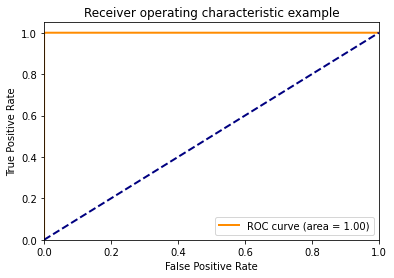

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### After the first attempt lets do set 2

Greyed out because it was copied for the precision-recall version

In [ ]:
#with open('set-2.class', 'r') as fh:
 # y_true, y_score = get_ROC_data(fh)

In [ ]:
#y_score = np.negative(np.log(y_score))  #negative of log-transform
#y_score = np.negative(y_score)

In [ ]:
#y_score

Getting the ROC

In [ ]:
#fpr, tpr, thr = roc_curve(y_true, y_score)

In [ ]:
#roc_auc = auc(fpr, tpr)

In [ ]:
#plt.figure()
#lw = 2
#plt.plot(
#    fpr,
#    tpr,
#    color="darkorange",
#    lw=lw,
#    label="ROC curve (area = %0.2f)" % roc_auc,
#)
#plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("Receiver operating characteristic example")
#plt.legend(loc="lower right")
#plt.show()

For imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. This is because a small number of correct or incorrect predictions can result in a large change in the ROC Curve or ROC AUC score.

Although ROC graphs are widely used to evaluate classifiers under presence of class imbalance, it has a drawback: under class rarity, that is, when the problem of class imbalance is associated to the presence of a low sample size of minority instances, as the estimates can be unreliable.

— Page 55, Learning from Imbalanced Data Sets, 2018.

A common alternative is the precision-recall curve and area under curve.

# Precision-recall AUC

### Set 1

In [ ]:
# calculate precision-recall curve
precision, recall, th = precision_recall_curve(y_true, y_score)


In [ ]:
# getting the AUC
roc_auc = auc(recall, precision)

In [ ]:
roc_auc

0.9810663358225107

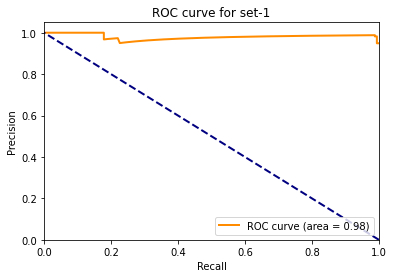

In [ ]:
plt.figure()
lw = 2
plt.plot(
    recall,
    precision,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([1, 0], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC curve for set-1")
plt.legend(loc="lower right")
plt.show()

In [ ]:
precision

array([0.94915254, 0.94886364, 0.95428571, 0.95977011, 0.96531792,
       0.97093023, 0.97660819, 0.98235294, 0.98224852, 0.98809524,
       0.98802395, 0.98795181, 0.98787879, 0.98780488, 0.98773006,
       0.98757764, 0.9875    , 0.98742138, 0.98734177, 0.98726115,
       0.98717949, 0.98709677, 0.98701299, 0.98684211, 0.98675497,
       0.98666667, 0.98657718, 0.98639456, 0.9862069 , 0.98591549,
       0.9858156 , 0.98571429, 0.98561151, 0.98550725, 0.98540146,
       0.98529412, 0.98518519, 0.98507463, 0.98496241, 0.98484848,
       0.98473282, 0.98461538, 0.98449612, 0.984375  , 0.98425197,
       0.98412698, 0.984     , 0.98387097, 0.98373984, 0.98360656,
       0.98347107, 0.98333333, 0.98319328, 0.98305085, 0.98290598,
       0.98275862, 0.9826087 , 0.98245614, 0.98214286, 0.98198198,
       0.98181818, 0.98165138, 0.98148148, 0.98130841, 0.98113208,
       0.98095238, 0.98076923, 0.98058252, 0.98039216, 0.98019802,
       0.98      , 0.97979798, 0.97938144, 0.97916667, 0.97894

In [ ]:
recall

array([1.        , 0.99404762, 0.99404762, 0.99404762, 0.99404762,
       0.99404762, 0.99404762, 0.99404762, 0.98809524, 0.98809524,
       0.98214286, 0.97619048, 0.9702381 , 0.96428571, 0.95833333,
       0.94642857, 0.94047619, 0.93452381, 0.92857143, 0.92261905,
       0.91666667, 0.91071429, 0.9047619 , 0.89285714, 0.88690476,
       0.88095238, 0.875     , 0.86309524, 0.85119048, 0.83333333,
       0.82738095, 0.82142857, 0.81547619, 0.80952381, 0.80357143,
       0.79761905, 0.79166667, 0.78571429, 0.7797619 , 0.77380952,
       0.76785714, 0.76190476, 0.75595238, 0.75      , 0.74404762,
       0.73809524, 0.73214286, 0.72619048, 0.7202381 , 0.71428571,
       0.70833333, 0.70238095, 0.69642857, 0.69047619, 0.68452381,
       0.67857143, 0.67261905, 0.66666667, 0.6547619 , 0.64880952,
       0.64285714, 0.63690476, 0.63095238, 0.625     , 0.61904762,
       0.61309524, 0.60714286, 0.60119048, 0.5952381 , 0.58928571,
       0.58333333, 0.57738095, 0.56547619, 0.55952381, 0.55357

In [ ]:
th

array([ 4.52287875,  4.79588002,  5.02227639,  5.07572071,  6.33724217,
        6.67778071,  7.67778071,  8.29242982,  8.85387196,  9.61978876,
       14.67778071, 14.85387196, 15.05551733, 15.09151498, 15.58502665,
       15.7212464 , 15.88605665, 16.19382003, 16.33724217, 16.39794001,
       16.65757732, 16.74472749, 16.76955108, 17.1426675 , 17.60205999,
       17.95860731, 18.08092191, 18.29242982, 18.58502665, 18.92081875,
       18.95860731, 19.03151705, 19.18045606, 19.34678749, 19.85387196,
       19.92081875, 20.02227639, 20.08618615, 20.19382003, 20.21467016,
       20.27572413, 20.65757732, 20.69897   , 20.85387196, 20.88605665,
       20.92081875, 21.46852108, 21.537602  , 21.63827216, 21.79588002,
       21.88605665, 21.92081875, 22.20065945, 22.40893539, 22.95860731,
       23.01322827, 23.25963731, 23.26760624, 23.4436975 , 23.58502665,
       23.79588002, 23.85387196, 23.88605665, 24.        , 24.04095861,
       24.1426675 , 24.34678749, 24.43179828, 24.46852108, 24.55

In [ ]:
print(precision.shape, recall.shape, th.shape)

(155,) (155,) (154,)


In [ ]:
th = np.append(th, 0)

In [ ]:
dip = np.array([precision,recall,th])

In [ ]:
dip.shape

(3, 155)

In [ ]:
dip = dip.T

In [ ]:
dip.shape

(155, 3)

In [ ]:
pd.DataFrame(dip, columns=['prec', 'rec', 'th'])

,prec,rec,th
0,0.949153,1.000000,4.522879
1,0.948864,0.994048,4.795880
2,0.954286,0.994048,5.022276
3,0.959770,0.994048,5.075721
4,0.965318,0.994048,6.337242
...,...,...,...
150,1.000000,0.023810,30.008774
151,1.000000,0.017857,30.795880
152,1.000000,0.011905,31.102373
153,1.000000,0.005952,31.657577


### Set 2

In [ ]:
with open('set-2.class', 'r') as fh:
  y_true, y_score = get_ROC_data(fh)

In [ ]:
y_score = np.negative(np.log(y_score))  #negative of log-transform
#y_score = np.negative(y_score)

In [ ]:
y_score

array([68.12204134, 65.61181689, 57.46931715, ..., -2.30258509,
       -2.30258509, -2.30258509])

In [ ]:
max(y_score)

78.81552590387993

Getting the ROC

In [ ]:
# calculate precision-recall curve
precision, recall, th = precision_recall_curve(y_true, y_score)


In [ ]:
precision

array([0.96      , 0.95977011, 0.96531792, 0.97093023, 0.97660819,
       0.98235294, 0.98816568, 0.98809524, 0.98802395, 0.98795181,
       0.98787879, 0.98780488, 0.98773006, 0.98765432, 0.98757764,
       0.9875    , 0.98742138, 0.98734177, 0.98726115, 0.98717949,
       0.98701299, 0.9869281 , 0.98684211, 0.98675497, 0.98666667,
       0.98657718, 0.98639456, 0.9862069 , 0.98601399, 0.98591549,
       0.9858156 , 0.98571429, 0.98561151, 0.98550725, 0.98540146,
       0.98529412, 0.98518519, 0.98507463, 0.98496241, 0.98484848,
       0.98473282, 0.98461538, 0.98449612, 0.984375  , 0.98425197,
       0.98412698, 0.984     , 0.98387097, 0.98373984, 0.98360656,
       0.98347107, 0.98319328, 0.98305085, 0.98290598, 0.98275862,
       0.9826087 , 0.98245614, 0.98230088, 0.98214286, 0.98198198,
       0.98181818, 0.98165138, 0.98148148, 0.98130841, 0.98113208,
       0.98095238, 0.98076923, 0.98058252, 0.98039216, 0.98019802,
       0.98      , 0.97979798, 0.97959184, 0.97938144, 0.97916

In [ ]:
recall

array([1.        , 0.99404762, 0.99404762, 0.99404762, 0.99404762,
       0.99404762, 0.99404762, 0.98809524, 0.98214286, 0.97619048,
       0.9702381 , 0.96428571, 0.95833333, 0.95238095, 0.94642857,
       0.94047619, 0.93452381, 0.92857143, 0.92261905, 0.91666667,
       0.9047619 , 0.89880952, 0.89285714, 0.88690476, 0.88095238,
       0.875     , 0.86309524, 0.85119048, 0.83928571, 0.83333333,
       0.82738095, 0.82142857, 0.81547619, 0.80952381, 0.80357143,
       0.79761905, 0.79166667, 0.78571429, 0.7797619 , 0.77380952,
       0.76785714, 0.76190476, 0.75595238, 0.75      , 0.74404762,
       0.73809524, 0.73214286, 0.72619048, 0.7202381 , 0.71428571,
       0.70833333, 0.69642857, 0.69047619, 0.68452381, 0.67857143,
       0.67261905, 0.66666667, 0.66071429, 0.6547619 , 0.64880952,
       0.64285714, 0.63690476, 0.63095238, 0.625     , 0.61904762,
       0.61309524, 0.60714286, 0.60119048, 0.5952381 , 0.58928571,
       0.58333333, 0.57738095, 0.57142857, 0.56547619, 0.55952

In [ ]:
th

array([12.56274759, 12.78589114, 13.28488231, 13.88808125, 14.1302213 ,
       18.08420851, 30.34912165, 30.6469561 , 30.68862879, 33.37562559,
       34.20230416, 36.14821431, 36.50488925, 36.65903993, 37.28764859,
       37.59638407, 37.75765222, 39.47245065, 39.62198238, 39.85729647,
       40.4532799 , 40.53024094, 40.75338449, 40.91590342, 41.69499303,
       41.74763677, 41.9573573 , 42.11987623, 42.15988156, 42.65050448,
       42.79360532, 42.96065941, 43.4867525 , 43.74911677, 44.13477925,
       44.6654075 , 45.13541113, 45.40984797, 45.52107361, 45.95639168,
       47.52137783, 47.8236587 , 47.94882184, 48.09192269, 48.1719654 ,
       48.38474616, 48.56500798, 48.68279102, 49.52546993, 49.9149347 ,
       50.12624379, 50.18686842, 50.32039981, 50.47455049, 50.65687205,
       50.81939098, 51.05734961, 51.15116837, 51.20159922, 51.23669054,
       51.25470905, 51.52437261, 51.59848059, 51.76553467, 52.48945351,
       52.69709287, 53.11028003, 53.19517947, 53.57564328, 53.75

In [ ]:
# getting the AUC
roc_auc = auc(recall, precision)

In [ ]:
roc_auc

0.986332801582066

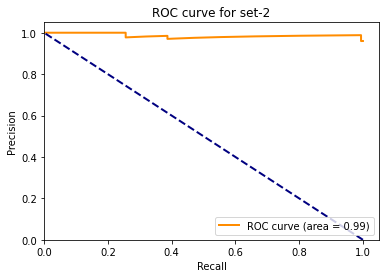

In [ ]:
plt.figure()
lw = 2
plt.plot(
    recall,
    precision,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([1, 0], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC curve for set-2")
plt.legend(loc="lower right")
plt.show()